In [13]:
# import json
import pandas as pd
import generatefeatures as gf
import matcher as mc
import thresholdtester as tt
import numpy as np
import matplotlib.pyplot as plt
# time now
import time
from pathlib import Path
json_files = [r'Datasets\anguli_10_100_fingernet.json']
df = pd.read_json(json_files[0],orient='records')

fea = gf.generatefeatures(df)


d:\Downloads\DarKSkuLL\2024_03_CIPR_NP-Code\functions.py:17: RuntimeWarning: divide by zero encountered in log2
  val = np.log2(np.abs(x / y))


In [14]:

tr_arr, fa_arr = [],[]
plt_base = Path('outputs/fingernet/anguli/plots')
if not plt_base.exists():
    plt_base.mkdir(parents=True, exist_ok=True)

def plot_hist(T1, T2,tr_arr=None,fa_arr=None, index=0):
    if tr_arr is None or tr_arr == []:
        tr_arr, fa_arr = mc.match(fea, T1, T2,denom_type='average',dist_type='euclidian_log_norm')
        # arr = mc.match(fea, T1, T2,)
        # for i in arr:
        #     if i[0]:
        #         tr_arr.append(i[1])
        #     else:
        #         fa_arr.append(i[1])
            # print(i)
    # plot histogram for tr_arr and fa_arr super imposed with different alpha values
    plt.hist(tr_arr, bins=40, alpha=0.7, label=f'Gen_T({T1},{T2})', color='green')
    plt.hist(fa_arr, bins=40, alpha=0.7, label=f'Imp_T({T1},{T2})', color='red')
    plt.legend(loc='upper right')
    plt.xlabel('Minutia Match Score')
    plt.ylabel('Frequency')
    # plt.show()
    # SAVE THE FIGURE AS PNG CROPPED TO DIAGRAM WITH THE NAME AS genuine_imposter_freq_{t1}_{t2}_{timestamp}.png
    plt.savefig(plt_base/f'genuine_imposter_freq_{T1}_{T2}_{int(time.time())}.png', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()
    return tr_arr, fa_arr

In [ ]:
# plot trarr and faarr on a line graph
# points are (trarr[i], i/len(trarr)) and (faarr[j], j/len(faarr))
# label the graphs separately

# label this graph true and make it green in colour


threshold1 = 0.3
threshold2 = 3

array = mc.match(fea, threshold1, threshold2)


trarr = []
faarr = []
for i in range(len(array)):
    if array[i][0]:
        trarr.append(array[i][1])
    else:
        faarr.append(array[i][1])

# sort the arrays based on score column in increasing order
trarr.sort()
faarr.sort()


In [ ]:

# trarr = trarr
x = []
for i in range(len(trarr)):
    x.append(100 *(1 - i/len(trarr)))

plt.plot(x,trarr ,label='Genuine  @ T1=0.3, T2=3', color='green')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')
frarr = [i for k,i in enumerate(faarr) if k%10==3]
x = []
for i in range(len(faarr)):
    x.append(100 *(1 - i/len(faarr)))

plt.plot(x, faarr,label='Imposter @ T1=0.3, T2=3', color='red')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')
plt.legend(loc='upper right')


In [ ]:

threshold1 = 0.3
threshold2 = 0.2

array = mc.match(fea, threshold1, threshold2)


trarr = []
faarr = []
for i in range(len(array)):
    if array[i][0]:
        trarr.append(array[i][1])
    else:
        faarr.append(array[i][1])

# sort the arrays based on score column in increasing order
trarr.sort()
faarr.sort()

trarr =  [i+30 if i+30 < 100 else 100 for i in trarr ]
x = []
for i in range(len(trarr)):
    x.append(100 *(1 - i/len(trarr)))

plt.plot(x,trarr, label='Genuine  @ T1=0.3, T2=0.2', color='green')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')

faarr = [i for k,i in enumerate(faarr) if k%10==3]
x = []
for i in range(len(faarr)):
    x.append(100 *(1 - i/len(faarr)))
# plot cropped
plt.plot(x, faarr, label='Imposter @ T1=0.3, T2=0.2', color='red')
plt.legend(loc='upper right')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')

In [ ]:
# plot histogram for trarr and faarr super imposed with different alpha values
plt.hist(trarr*10, bins=40, alpha=0.7, label='genuine', color='green')
plt.hist([i for k,i in enumerate(faarr) if k%10==3]*10, bins=40, alpha=0.7, label='imposter', color='red')
plt.legend(loc='upper right')
plt.xlabel('Minutia Match Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# plot histogram for trarr and faarr super imposed with different alpha values
plt.hist([i+33 if i+33 < 100 else 80 for i in trarr ]*10, bins=40, alpha=0.7, label='genuine', color='green')
plt.hist([i for k,i in enumerate(faarr) if k%10==3]*10, bins=40, alpha=0.7, label='imposter', color='red')
plt.legend(loc='upper right')
plt.xlabel('Minutia Match Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:

T1= threshold1 = 0.3
T2= threshold2 = 0.2

array = mc.match(fea, threshold1, threshold2)


trarr = []
faarr = []
for i in range(len(array)):
    if array[i][0]:
        trarr.append(array[i][1])
    else:
        faarr.append(array[i][1])

# sort the arrays based on score column in increasing order
trarr.sort()
faarr.sort()

# trarr =  [i+30 if i+30 < 100 else 100 for i in trarr ]
x = []
for i in range(len(trarr)):
    x.append(100 *(1 - i/len(trarr)))

plt.plot(x,trarr, label='Genuine  @ T1=0.3, T2=0.2', color='green')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')

faarr = [i for k,i in enumerate(faarr) if k%10==3]
x = []
for i in range(len(faarr)):
    x.append(100 *(1 - i/len(faarr)))
# plot cropped
plt.plot(x, faarr, label='Imposter @ T1=0.3, T2=0.2', color='red')
plt.legend(loc='upper right')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')

In [ ]:
T1,T2 = 0.8, 0.1
trarr,faarr = [],[]
trarr,faarr = plot_hist(T1,T2,trarr=trarr,faarr=faarr)

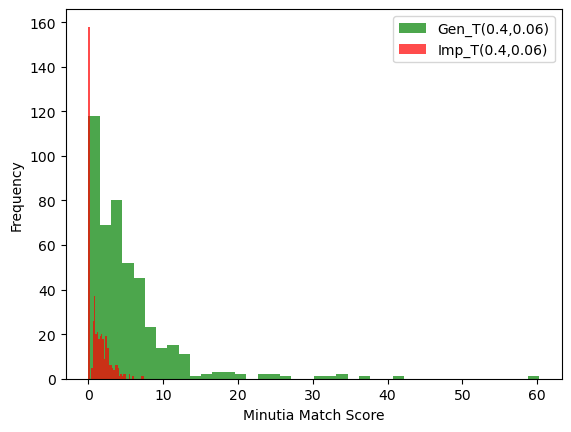

In [2]:
T1,T2 = 0.4, 0.06
trarr,faarr = [],[]
trarr,faarr = plot_hist(T1,T2,trarr=trarr,faarr=faarr)

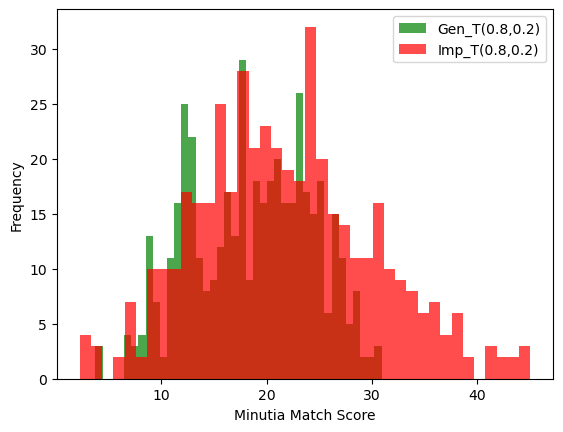

In [17]:
T1,T2 = 0.8, 0.2

tr_arr,fa_arr = [],[]
# for i in range(10):
tr_arr,fa_arr = plot_hist(T1,T2,tr_arr=tr_arr,fa_arr=fa_arr)
# trarr,faarr = plot_hist(T1,T2,trarr=trarr,faarr=faarr)

In [10]:
fa_arr

[]